# Billionaires Dataset Project
### By Jonathan Ibarra and Boone Losche



In [3]:
# Dataset: https://www.kaggle.com/datasets/javiersab/billionaires-dataset-cleaned
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import scipy.signal
import matplotlib.pyplot as plt

## Our dataset
For this project, we decided to go with a dataset of billionaires which includes many features such as their country's tax rate, their age, the industry they are in, their education level, etc.  We chose this project because we were deeply interested in finding any correlations between an individual's circumstances/attributes and their immense wealth. The end ideal goal is to create a model that can fairly accurately predict one's accumulated wealth (given they are a billionaire.) Going into this project we are aware that there are hundreds of factors that can influence an individual's wealth, not all of which are captured by this dataset. However, given this dataset’s focus on the billionaire's country’s conditions, such as tax rate, CPI, life expectancy, GDP, etc, we are interested in seeing the relationships that exist between the features and one's ability to accumulate unthinkable amounts of wealth.    


In [4]:
# Importing the dataset, and displaying the head or a few data points
billionaire_data = pd.read_csv("df_ready.csv", delimiter=',')
pd.set_option('display.max_columns', 100)
billionaire_data.head(75)



,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,birth_date,last_name,first_name,residence_state,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,1949-03-05,Arnault,Bernard,No subdivisions info,No subdivisions info,1949,3,5,110.05,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,1971-06-28,Musk,Elon,Texas,South,1971,6,28,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,1964-01-12,Bezos,Jeff,Washington,West,1964,1,12,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,1944-08-17,Ellison,Larry,Hawaii,West,1944,8,17,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,1930-08-30,Buffett,Warren,Nebraska,Midwest,1930,8,30,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,22000,Food & Beverage,Emmanuel Besnier,52,France,Laval,Cheese,France,M,1970-09-18,Besnier,Emmanuel,No subdivisions info,No subdivisions info,1970,9,18,110.05,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
71,72,21600,Finance & Investments,Abigail Johnson,61,United States,Milton,Fidelity,United States,F,1961-12-19,Johnson,Abigail,Massachusetts,Northeast,1961,12,19,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
72,72,21600,Energy,Leonid Mikhelson & family,67,Russia,Moscow,"Gas, chemicals",Russia,M,1955-08-11,Mikhelson,Leonid,No subdivisions info,No subdivisions info,1955,8,11,180.75,4.5,1699876578871,81.9,102.6,72.7,11.4,46.2,144373535,61.524010,105.318756,Europe
73,74,21200,Fashion & Retail,Lukas Walton,36,United States,Chicago,Walmart,United States,M,1986-09-19,Walton,Lukas,Illinois,Midwest,1986,9,19,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America


## Understanding The Data
Lets take a look at some of the features and their distributions within the dataset to see what we can learn.

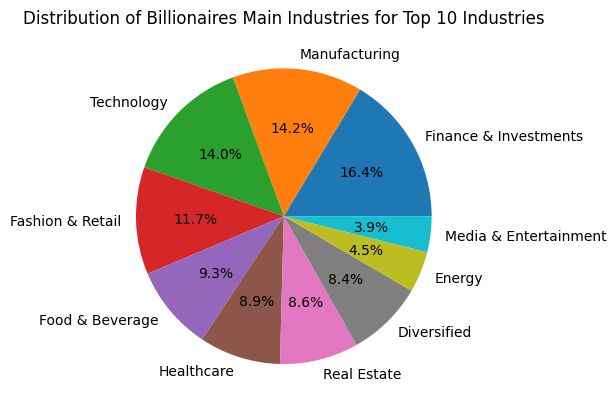

<Figure size 800x600 with 0 Axes>

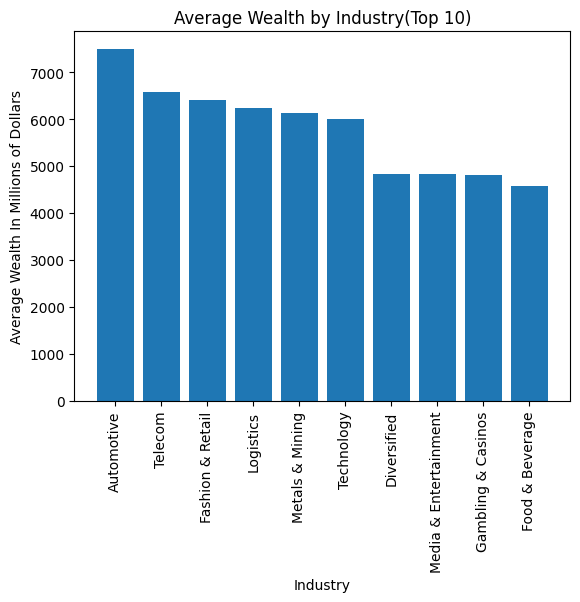

<Figure size 800x2000 with 0 Axes>

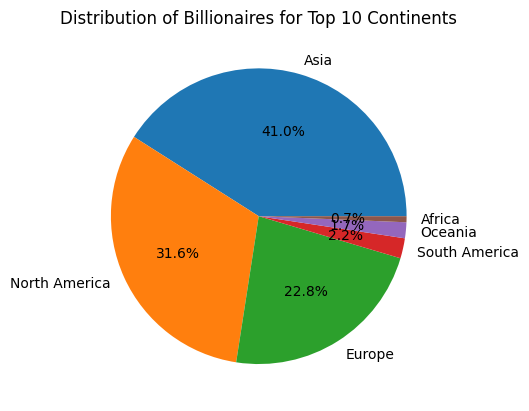

<Figure size 800x600 with 0 Axes>

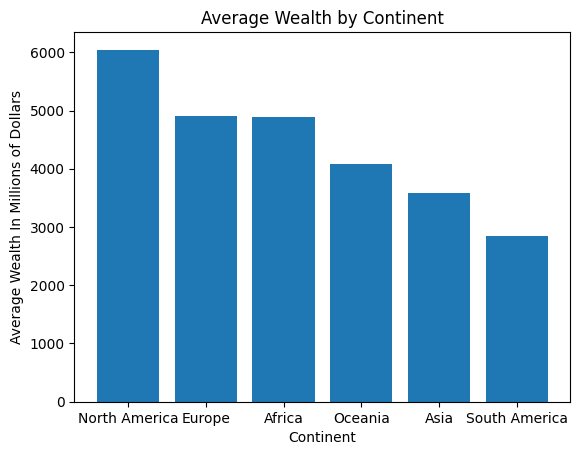

<Figure size 800x1400 with 0 Axes>

In [5]:
# Get number of members of a certain industry and plot top 10
industry_counts = billionaire_data['industry'].value_counts()
plt.pie(industry_counts[:10], labels=industry_counts[:10].index.tolist(), autopct="%1.1f%%")
plt.title("Distribution of Billionaires Main Industries for Top 10 Industries")
plt.figure(figsize=(8, 6))
plt.show()

# Get average wealth by country and plot it as a bar chart
average_industry_wealth = billionaire_data.groupby('industry')['wealth'].mean().sort_values(ascending=False)
plt.bar(average_industry_wealth[:10].index.tolist(), average_industry_wealth[:10])
plt.title('Average Wealth by Industry(Top 10)')
plt.xlabel('Industry')
plt.ylabel('Average Wealth In Millions of Dollars')
plt.xticks(rotation=90)
plt.figure(figsize=(8, 20))
plt.show()

# Get number of billionaires in each continent and print top 10
continent_counts = billionaire_data['continent'].value_counts()
plt.pie(continent_counts[:10], labels=continent_counts[:10].index.tolist(), autopct="%1.1f%%")
plt.title("Distribution of Billionaires for Top 10 Continents")
plt.figure(figsize=(8, 6))
plt.show()

# Get average wealth by continent and plot it as a bar chart
average_country_wealth = billionaire_data.groupby('continent')['wealth'].mean().sort_values(ascending=False)
plt.bar(average_country_wealth.index.tolist(), average_country_wealth)
plt.title('Average Wealth by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Wealth In Millions of Dollars')
plt.figure(figsize=(8, 14))
plt.show()

## Discussing The Dataset
Going into the billionaire dataset the task of sifting through it to find patterns is daunting. As seen above we went to see if theres any immediatley observable traits in the dataset. The most obvious would be to see which industries/continents tend to have the most billionaires, and what the average wealth is by industry/country. From our inital look tech and manufacturing makes the most amount of billionaires, but those in automotive and telecommunications have the highest average wealth. This leads us to believe there may be a fairly strong correlation between industry and wealth. Especially given how there is a decent amount of variation in industries average wealth.

Next was doing the same process by continent. Asia has the most billionaires, but North America has the highest average wealth. Also similar to industry the number of billionaires in a certain category does not reliably translate to average wealth. We believe that there will be a fairly large correlation between continent/country/country GDP and wealth as there is a stark difference in average wealth for these categories.

From our initial dive into the data we believe that Industry, Continent, and Country(along with its GDP) are going to be the best features to rely on when estimating wealth given their variation.  

## Cleaning The Data

We are going to need to clean our data. The main things to address in the dataset is encoding categorical variables to numeric ones, such as industry, country of residence, gender, etc. Another is dropping features that are not useful for training. This includes things like full name, residence state(some observations have NaN values), etc.

In [6]:
cleaned_billionaires_data = billionaire_data
# encode certain categorical variables to numeric representations
for col in ['industry', 'country_of_residence', 'citizenship', 'gender', 'continent']:
  cleaned_billionaires_data[col] = pd.factorize(cleaned_billionaires_data[col])[0]

# drop certain features
cleaned_billionaires_data = cleaned_billionaires_data.drop(columns=['cpi_change_country','cpi_country','city_of_residence', 'source', 'full_name', 'last_name', 'first_name', 'residence_state', 'residence_region', 'birth_date', 'birth_year', 'position', 'birth_month', 'birth_day', 'country_lat', 'country_long'])
cleaned_billionaires_data.astype('float32')
cleaned_billionaires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wealth                2591 non-null   int64  
 1   industry              2591 non-null   int64  
 2   age                   2591 non-null   int64  
 3   country_of_residence  2591 non-null   int64  
 4   citizenship           2591 non-null   int64  
 5   gender                2591 non-null   int64  
 6   gdp_country           2591 non-null   int64  
 7   g_tertiary_ed_enroll  2591 non-null   float64
 8   g_primary_ed_enroll   2591 non-null   float64
 9   life_expectancy       2591 non-null   float64
 10  tax_revenue           2591 non-null   float64
 11  tax_rate              2591 non-null   float64
 12  country_pop           2591 non-null   int64  
 13  continent             2591 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 283.5 KB


Now we are going to split the data into train/test split as well as normalization and regularization

In [7]:
X_train = cleaned_billionaires_data.sample(frac=0.8, random_state=0)
X_test = cleaned_billionaires_data.drop(X_train.index)
y_train = X_train.pop('wealth')
y_test = X_test.pop('wealth')

X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

print(len(X_train), 'training examples')
print(len(X_test), 'test examples')

2073 training examples
518 test examples


## Model Baseline:
For our model basline we used a simple multi-variate linear regression neural network. For all models, we made sure to include a normalizer layer

In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [9]:
normalizer.adapt(X_train)

In [10]:
# Demonstration and understanding of model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [11]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_absolute_error')

In [12]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs=100,
    verbose=1,
)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4823.8701 - val_loss: 4485.7954
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4523.7446 - val_loss: 4479.3394
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4759.0327 - val_loss: 4472.8516
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4753.3525 - val_loss: 4466.3730
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4642.0654 - val_loss: 4459.8076
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4681.8896 - val_loss: 4453.3252
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4754.0771 - val_loss: 4446.8276
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4459.2764 - val_loss: 4440.3125
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4726.3330 - val_loss: 4433.8027
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4339.4653 - val_loss: 4427.3311
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4536.5410 - val_loss: 4420.81

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,4089.029053,3868.231689,95
96,4082.550049,3861.778809,96
97,4076.066162,3855.395996,97
98,4069.544189,3848.785645,98
99,4063.062256,3842.302002,99


In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Wealth]')
  plt.legend()
  plt.grid(True)

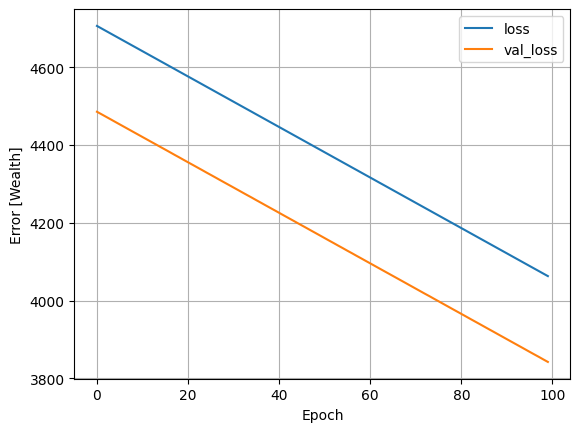

In [15]:
plot_loss(history)

In [16]:
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    np.array(X_test, dtype='float32'), y_test, verbose=0)

### About the results
As you can see, the modal did not perform that well with a mean-absolute-error in the the 4000-3000 range. Next, we will move to a deep neural-network with more breath and depth.

## Final model:


In [17]:
# Demonstration and understanding of model selection methods
dnn_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, name='Wealth')
])

In [18]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_error')

In [19]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs=100,
    verbose=1,
)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4623.9404 - val_loss: 4480.4014
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4608.3091 - val_loss: 4422.8960
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4354.5493 - val_loss: 4250.7773
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4603.5664 - val_loss: 3887.4316
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3940.3391 - val_loss: 3385.2490
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3384.4819 - val_loss: 3104.1743
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3292.4661 - val_loss: 2995.4641
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3223.2190 - val_loss: 2960.8965
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3162.3103 - val_loss: 2950.3428
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3082.5537 - val_loss: 2944.4246
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3265.4939 - val_loss: 2941.02

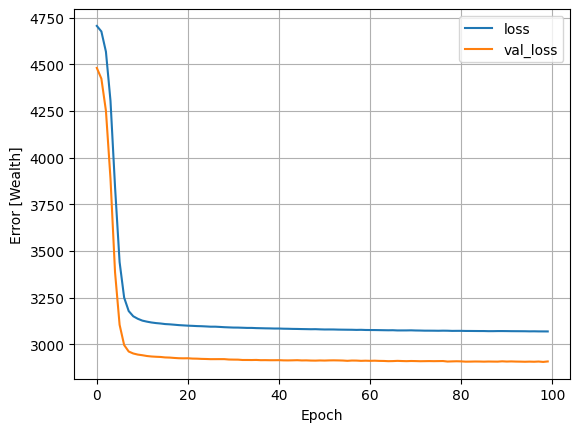

In [20]:
plot_loss(history)

In [21]:
test_results['dnn_model'] = dnn_model.evaluate(np.array(X_test, dtype='float32'), y_test, verbose=0)

## Epiphany
After consideration, we realzied that the top righest people in the world heavily skewed our predictions, so we re-ran the model without the top 75 richest people.

In [22]:
cleaned_billionaires_data_cut = cleaned_billionaires_data[75:]
X_train = cleaned_billionaires_data_cut.sample(frac=0.8, random_state=0)
X_test = cleaned_billionaires_data_cut.drop(X_train.index)
y_train = X_train.pop('wealth')
y_test = X_test.pop('wealth')

X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

print(len(X_train), 'training examples')
print(len(X_test), 'test examples')

2013 training examples
503 test examples


In [23]:
dnn_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear', name='Wealth')
])

In [24]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_error')

In [25]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs=100,
    verbose=1,
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3414.0698 - val_loss: 3155.8916
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3340.7563 - val_loss: 3101.1106
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3334.7043 - val_loss: 2939.9348
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3171.4663 - val_loss: 2596.3254
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2674.4155 - val_loss: 2097.7566
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2374.1350 - val_loss: 1781.4161
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1929.7794 - val_loss: 1691.4264
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1930.3462 - val_loss: 1675.4839
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1913.7710 - val_loss: 1670.8405
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1906.0261 - val_loss: 1668.8949
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1884.0325 - val_loss: 1667.62

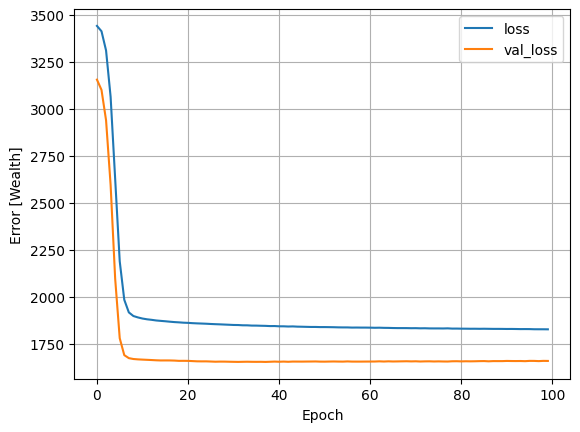

In [26]:
plot_loss(history)

In [27]:
test_results['dnn_model without top 75'] = dnn_model.evaluate(np.array(X_test, dtype='float32'), y_test, verbose=0)

## Results:


In [28]:
# Display results using graphs and tables
pd.DataFrame(test_results, index=['Mean absolute error [Wealth]']).T

,Mean absolute error [Wealth]
linear_model,3842.302002
dnn_model,2907.680664
dnn_model without top 75,1660.603027


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


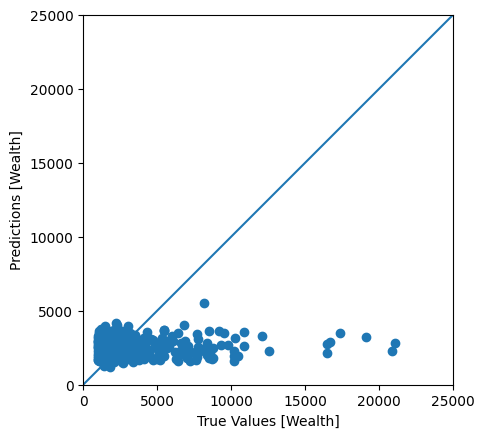

In [29]:
test_predictions = dnn_model.predict(np.array(X_test, dtype='float32')).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Wealth]')
plt.ylabel('Predictions [Wealth]')
lims = [0, 25000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

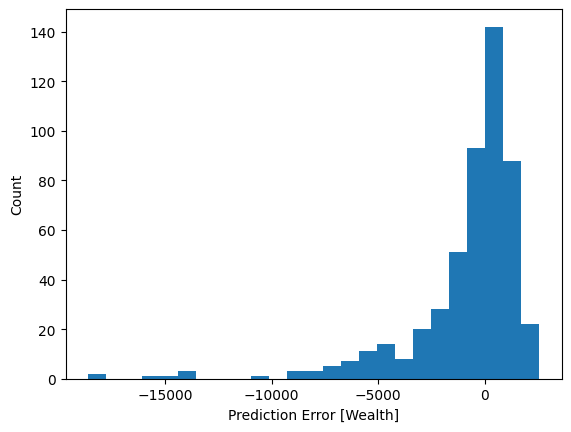

In [30]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Wealth]')
_ = plt.ylabel('Count')

## Discussion:
After taking a look at the data and its internal distributions we had assumed that things such as continent, country, and industry would have the strongest influence over wealth. From the linear regression model (our baseline) we did see a fairly consistently decreasing loss value over epochs. This loss value was still quite high (ended around 4000). We decided to then further improve upon our previous model by creating a Deep Neural Network Regression model with two layers of 64 neurons that apply the ReLU(Rectified Linear Activation) activation function and a one-neuron layer to predict the continuous variable of wealth. We then saw an improvement with a loss value ending around 3000 and a mean absolute error of 2908. This was an improvement from the previous model but we still wanted to see some improvement.

Our epiphany came when reexamining the data. Even within the data for billionaires there still exists vast gaps in wealth between the wealthiest few and the others. The top 50 to 75 individuals had wealth far beyond the standard for the dataset. We decided to see one more time if we could improve upon our model. We decided to cut the top 75 wealthiest data points and put the dataset back through the same processes we did in the previous DNN model. This showed major improvements from the baseline, even more than the initial jump. We had a loss score ending around 1827, and a mean absolute error of 1655, which was a roughly 56% decrease in mean absolute error from the baseline.

Overall our findings were not quite what we expected. Despite playing around with our model such as making it vastly deeper, changing the learning rate, and using all kinds of different hyperparameters we still could not get the model as accurate as we had expected to be able to when going into this project. We believe that this shows that the features our dataset contains are not the whole story of wealth. We must remember there are millions of factors that go into the generation of wealth, not to mention that wealth is often generational and not all attributable to one individual. While there was some relationship between our favored features and wealth, there is simply not enough to go on within the dataset to accurately form a regression model for the wealth of billionaires.

In the future, if we were to go about this again, it would be helpful to have a much more detailed dataset with many more features, as well as to thoroughly go through the observations for outliers or extenuating circumstances. Overall it was an excellent project to learn more about multivariate regression, tensorflow, machine learning, and the nature of wealth.

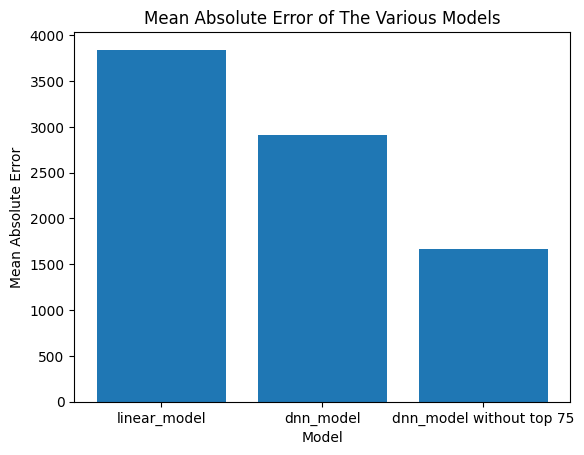

In [31]:
labels = list(test_results.keys())
values = list(test_results.values())


plt.bar(labels, values)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of The Various Models')
plt.show()